# Machine Learning & Data Analytics Cheat Sheet

This notebook contains useful Python code for Machine Learning practices.
- by: Daniel Bejarano

## 1. Loading Datasets

In [5]:
# Loading Saved Datasets
from sklearan.datasets import load_boston
boston = load_boston()
boston['data'] # to access X
boston['feature_names'] 
boston['target'] # to access y

## 2. Data Pre-Processing

### 2.1 Cleaning Data

In [ ]:
# Missing Values

# Fill Null Values Based on Classes Mean Values
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 'mean for pclass 1'
        elif pclass==2:
            return 'mean for pclass 2'
        else:
            return 'mean for pclass 3'
    else:
        return age
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

# Imputer
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'string shown on missing values',
                 strategy='mean', axis=0) #axis=0 takes mean of the columns
imputer.fit(X['columns_with_missing_data'])
X['columns_with_missing_data'] = imputer.transform(X['columns_with_missing_data'])

# Droping
df.drop('col', axis=1, inplace=True) # an entire column
df.dropna(inplace=True) # rows with missing values

# Fill NA values
df['A'].fillna(value=df['A'].mean())

# Remove Duplicates
df.duplicated()

# Normalization and Standardization
x -= x.mean(axis=0)
x /= x.std(axis=0)

### 2.2 Pre-Processing Categorical Data

In [ ]:
# Creating Dummy Variables
cat_feats = ['col1', 'col2']
final_data = pd.get_dummies(df, columns=cat_feats, drop_first=True) # removes one of them to avoid redundant information
#OR
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
X =onehotencoder.fit_transform(X).toarray()

# Creating labelencoders - UNLESS THE CATEGORIES HAVE A RELATINOAL ORDER, USE DUMMY VARIABLES
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X['cat_column'] = labelEncoder.fit_transform(X['cat_column'])

# Write Cleansed Data to file
df.to_csv('cleaned_df', sep=',')

### 2.3 Train-Val-Test Splits

In [ ]:
from sklearn.model_selection import train_test_split # Split before performing EDA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
train_data, test_data = train_test_split(df, test_size=0.25) # when don't want to define X and y

### 2.4 Normalization & Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler # scale can greatly affect the result of the model

scaler = StandardScaler()
scaler.fit(df.drop('y', axis=1))
scaled_X = scaler.transform(df.drop('y', axis=1))
X = pd.DataFrame(scaled_X, columns=df.columns[:-1]) # assuming y is the last column

## 3. Exploratory Data Analysis

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') 
    # great visualization of missing (NA, NaN, null) values
    
# Basic Data Exploration
df.info()
sns.pairplot(df)
sns.distplot(df.y)
sns.heatmap(df.corr(annot=True))

## 4. Fine Tuning Models

### 4.1 Cross-Validation

In [ ]:
'''Preferable to be done with GridSearchCV'''

from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

parameters = [{'C': [1,10], 'kernel':['linear']}
             {'C':[1,10], 'kernel':['rbf'], 'gamma':[0.5, 0.1]}]
grid_s = GridSearchCV(SVC(), param_grid=parameters, scoring='accuracy', cv=10, refit=True, verbose=3)
grid_s = grid_s.fit(X_train, y_train)
best_accuracy = grid_s.best_score_
best_params = grid_s.best_params_

RandomizedSearchCV # alternative to GridSearchCV where you can explore more parameter options and 
# control the number of iterations - good for when needing to explore many many hyperparameters/models

# A more flexible, more manual approach that stratisfies the splits:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_model = clone(model)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test-fold = X_test[test_index]
    y_test_fold = y_test[test_index]
    
    clone_model.fit(X_train_folds, y_train_folds)
    y_pred = clone_model.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold) # for classification
    print(n_correct / len(y_pred))
    
# Doing Cross Val without GridSearch
accuracies = cross_val_score(estimator=name_of_model, X=X_train, y=y_train, cv=10)

## 5. Pipelines

In [ ]:
# GRID-SEARCH + PIPELINES - Kernel PCA Example as preprocessing and Logistic 

clf = Pipeline([
        ('kpca', KernelPCA(n_components=2)),
        ('log_reg', LogisticRegression())
        ])

param_grid = [{
        'kpca_gamma': np.linspace(0.03, 0.05, 10),
        'kpca_kernel': ['rbf', 'sigmoid']
        }]

grid_search = GrisSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)
grid_Search.best_params_

## 6. Ensemble Methods

In [ ]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('svc', svc_clf)],
                              voting='hard')
voting_clf.fit(X_train, y_train)
'''where the estimators are a list of classifiers. The more and more diverse 
they are the better'''

### 6.1 Bagging
Bagging as shown below is analogous to using RandomForests using a Decision Tree classifier. Meaning, if we used BaggingClassifier with a DecisionsTreeClassifier is the same as if we used RandomForestClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(svm_clf, n_estimators=500, max_samples=100,
                           bootstrap=True, n_jobs=1,oob_score=True)
# fit and test as usual
bag.clf.oob_score_ #gives the automatically calculated out-of-bag accuracy rate
# which is a good approximation of the error to be expected on the test set
bag_clf.oob_decision_function_ # class's probability estimate, if model computes it
'''n_jobs is the number of CPU cores to use (-1 means all available cores)'''

### 6.2 Boosting

#### 6.2.1 ADA Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             n_estimators=400, algorithm='SAMME.R', learning_rate=1)
# SAMME.R is a multiclass ADA booster algorithm which uses class probability estimates
# SAMME uses predictions instead of probabilities 

#### 6.2.2 Gradient Boosting
Can use different cost functions, if desired

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=.5)

# Findind the optimal number of predictors

X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in
         gbrt.staged_predict(X_val)] 
'''staged_predict() returns an iterator over the predictions made by
the ensemble at each stage of training (with 1 tree, 2 trees, 3...),
from where we can get the number of estimators that (1, 2, 3...) with min error'''
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

#### 6.2.3 XGBoost
To be used with neural networks mainly

In [ ]:
# 1. High performance
# 2. Fast execution speed
# 3. Get to keep interpretation of model

from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

### 6.3 Stacking
Not supported by scikit-learn...yet.

## 7. Machine Learning Models and Algorithms

### 7.0 Evauation Metrics

#### 7.0.1 Classification

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, pred)) # OR
print(confusion_matrix(y_test, pred))

from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_train, y_pred)

# Plot Prediction Boundaries 
fig = plt.figure(figsize=(12, 8))
plot_decision_regions(X, y, clf=model_name, legend=2)

### 7.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
pred = logmodel.predict(X_test)

### 7.2 Linear Regression

#### 7.2.1 Simple and Polynomial

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train) # you can grab lm.intercept_, lm.coef_
cdf = pd.DataFrame(np.transpose(lm.coeff_), X.columns, columns = ['Coeff'])

# Alternative: Fit model using stat API - Provides a more comprehensive set of model parameters
import statsmodels.api as sm
X = sm.add_constant(lstat_df)
est = sm.GLS(y, X)
est2 = est.fit()
pred = est2.predict()
print(est2.summary())

# Predict
pred = lm.predict(X_test)
plt.scatter(y_test, pred)
sns.distplot((y_test-pred)) # histogram of the residuals - Normally distributed residuals is a good sign

# Metrics to evaluate model
metrics.mean_absolute_error(y_test, pred) # easy to interpret: average error
metrics.mean_squared_error(y_test, pred) # preferable because it punishes larger errors more greatly
np.sqrt(metrics.mean_squared_error(y_test, pred)) # Root Mean Squared Error - Same units as y

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_fet = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X) # now contains X and X^2 features
'''Note that if more than 1 columns are given, it will return all the combinations
of the features that will give the degree specified. If df = x1, x2, x3 and
degree=2, we will get 1, x1, x2, x3, x1^2, x1*x2, x1*x3, x2^2, x2^x3, x3^2'''
lin_reg.fit_(X_poly, y)

#### 7.2.2 Regularization

In [ ]:
# Ridge Regression
# A) Using the Closed Form (Normal) Equation
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
'''fit and predict as usual'''
# B) Using Stochastic Gradient Descent
# Great Source: https://iamtrask.github.io/2015/07/27/python-network-part2/
sgd_reg = SGDRegressor(penalty='l2')
''' fit and predict as usual'''

# Lasso Regression
sgd_reg = SGDRegressor(penalty='l1') # OR...
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) '''fit and predict as usual'''

# Elastic Net
from sklearn.linear_model import Elasticnet
el_net = EleasticNet(alpha=0.1, l1_ratio=0.5) # half Ridge, half Lasso

### 7.3 Naive Bayes
It's used mainly in Linear Discriminant Analysis but is itself a classification algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GAussianNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

# Example: Naive Bayes to classify emails
from sklearn.naive_bayes import MultinomialNB
spam_model = MultinomialNB().fit(mess_tfidf, df['label'])
pred = spam_model.predict(mess_tfidf)

### 7.4 K-Nearest Neighbors

In [6]:
'''Remember to normalize and scale values prior to fitting model. See Data Pre-Processing section above'''

from sklearn.neighbors import KNeighborsClassifier
knn = KneighborsClassifier(n_neighbors=1)

# Determine K iteratively 
'''This can be substituted with GridSearchCV'''
error_rate = []
for i in range(1:30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

### 7.5 Tree-Based Methods

#### 7.5.1 Decision Trees

In [ ]:
# Classification
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)

# Regression
from sklearn.tree import DecisionTreeRegressor #fit and train as usual

# Visualization of Trees
'''Not useful for Random Forests, but useful for single trees'''
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True)
                
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

#### 7.5.2 Random Forests

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestClassifier(n=estimators = 200)
#...
rfc.feature_importances_

# Extremely Randomized Trees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

### 7.6 Support Vector Machines (SVM)

In [4]:
''' Perform Feature Scaling prior to fitting model'''
'''In SVMs, must set "probability=True" for it to provide class probabilities'''

from sklearn.svm import SVC 
from sklern.svm import LinearSVC # much faster than SVC, assuming linear
from sklearn.grid_search import GridSearchCV

# Specifying Parameters 
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
pred = svc.preict(X_test) 
# classification_report and confusion_matrix as usual

# Finding the Best Parameters - ALWAYS USE THIS FOR SVM
'''Since grid search can take very long, one suggestion is to perform your grid search on a small 
copy of your dataset or using a small subset of the parameter values you want to try, to make sure 
it works as expected. Then do it on whole dataset and using all the desired parameters over night 
or something'''
param_grid = {'C':[.1, 1, 10], 'gamma':[1, .1, .01]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3) # set verbose to at least 2 to know if model is doing something
grid.best_params_
grid.best_estimator_
grid_pred = grid.predict(X_test)
# classification_report and confusion_matrix as usual

'''Remember to scale back predictions when doing SVR (regression).'''
y = StandardScaler()
ss_y = y.fit(y)
y_pred = ss_y.inverse_transform(predictions)

# For huge datasets, use SGDClassifier, since it can do out-of-core training
sgd_svm = SGDClassifier(loss='hinge', alpha=1/(m*C)) # data must be scaled and centered around 0
'''applies SGD to train a linear SVM classifier'''

# SVM Regression #
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
# epsilon acts as C in classification - determines the width of the margin

# For Multivariate Classification
'''Random Forests and Bayes can do it directly, but SGD and SVM can't'''
from sklearn.multiclass import OneVsOneClassifier # OR OneVsAllClassifier
model = OneVsOneClassifier(SGDClassifier()) # or SVM or other 
#...

### 7.7 Apriori
Simple basic way of determining likelihood that a certain action happens given another action. Recommender Systems is a more robust version of it. How likely are customers to buy bananas if they bought chips? Steps:
1. Set a minimum support and confidence
2. Take all the subsets in transactions having higher support than minimum support
3. Take all the rules of these subsets having higher confidence than the minimum confidence
4. Sort hte rules by decreasing lift

In [ ]:
from apyori import apriori
rules = apriori(transactions, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2)

# Eclat
# Step 1: Set a minimum support
# Step 2: take all the subsets in transactions having higher support than minimum support
# Step 3: Sort these subsets by decreasing support

### 7.8 K-Means Clustering
The goal is not to predict something, but rather to find patterns in the data

#### 7.8.1 Basic K-Means

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
kmeans.cluster_centers_
kmeans.labels_

# Pringint Graph with labels
fig, ax = plt.figure(figsize=(10, 6))
ax.scatter(df['col1'], data['col2'], c=kmeans.labels_, cmap='rainbow')

# Using the Elbow Method to Choose K  (which also uses k-means++) !
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    plt.plot(range(1,11), wcss)
'''From observing the graph choose k based on the elbow. Here, assume 5 is the best'''
kmeans = KMeans(n_cluster=5, init='k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

#### 7.8.2 Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendogram(sch.linkage(X, method='waard'))
plt.plot(dendogram)

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc hc.fit_predict(X)

### 7.9 Dimensionality Reduction / Feature Extraction Methods

#### 7.9.1 Principal Component Analysis (PCA)

In [ ]:
# PCA without Scikit-Learn (for funsies)
X_centered = X-X.mean(axis=0)
U, s, Vt= np.linalg.svd(X_centered)
C1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

# PCA w/ Scikit-Learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

pca = PCA(n_components=2) # OR you can specify a number between 0 and 1...
pca = PCA(n_components=0.95) # which gives you enough components to explain 95% of the variance
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape
first_component = x_pca.components_.T[:, 0]
evr = x_pca.explained_variance_ratio_ # how much of the variance lies on each PC

# Visualization of Components
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['target column']) # added color to see if target variable is discernable in the PCs
pca.components_
df_comp = pd.DataFrame(pca.components_, columns=df.columns)
sns.heatmap(df_comp, cmap='plasma') # the hotter the color the more correlated to a feature the PCs are

# To decompress data back to its original form - although some info has been lost
X_recovered = pca.inverse_transform(X_reduced)

#### 7.9.2 Incremental PCA
For VERY large datasets

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pa = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pa.partial_fit(X_batch)
    
X_reduced= inc_pca.transform(X_train)

#### 7.9.3 Randomized PCA
Faster when d is way smaller than n 

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

#### 7.9.4 Kernel PCA
Complex nonlinear projections for dimensionality reduction 

In [ ]:
from sklearn.decomposition import KernelPCA
rbc_pca = KernelPCA(n_componets=2, kernel='rbf', gamma=0.04)
X_train_reduced = rbc_pca.fit_transform(X_train)
X_test_reduced = rbc_pca.transform(X_test)

#### 7.9.5 Linear Discriminant Analysis (LDA)

In [7]:
from sklearn.disccriminant_analysis import LinearDiscriminantAnalysis as LDA
X_train = LDA.fit_transform(X_train, y_train)
X_test = LDA.transform(X_test)

### 7.10 Recommender Systems

STEPS for Movie Reviews Example:
1. Use pd.pivot_table to create a matrix. Rows as users. Columns as movies reviewed. Values as ratings 
2. similar_to_starwars = matrix_df.corrwith(starwars_ratings)
3. Filter out movies with less than y number of reviews - to avoid high correlation between movies that just  ONE person reviewed, who also happened to review StarWars

For a BETTER example look at assignment from Coursera's ML Course

### 7.11 Natural Language Processing

#### 7.11.1 Using NLTK

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

nltk.download_shell() # do "d" and then "stopwords" to download the stopwords packages

def text_process(mess):# mess stands for message
    '''
    1. Remove punctuation
    2. Remove Stop Words
    3. Return list of cleaned text words
    '''
    ps = PorterStemmer()
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc) # to join together separated characters back into words
    return [ps.stem(w) for w in nopunc.split() if w.lower() not in stopwords.words('english')]

''' Stemming and lemmitization perform badly when we have short-hand words like u for you, etc
BUT, for other purposes we NEED TO ADD STEMMING AND LEMMITIZATION TO FUNCTION ABOVE !!! '''
lemmatizer = WordNetLemmatizer()
result = [lemmatizer.lemmatize(t) for t in items]

bow_transformer = CountVectorizer(analyzer=text_process, max_features=2000).fit(df['mess'])
# bag of words. We add our own analyzer to avoid specifying the large number of parameters CountVectorizer requires
bow_transformer.vocabulary_ # gives the number of words in our vocabulary
bow_transformer.get_feature_names()[a_number] # gives the word at index a_number
mess_bow = bow_transformer.transform(df['mess'])

# Check the resulting BoW for all messages 
sparcity = (100.0 * mess_bow.nnz / (mess_bow.shape[0] * mess_bow.shape[1])) # nonzeros/total

# TF-IDF
tfidf_transformer = TfidfTransformer().fit(mess_bow)
mess_tfidf = tfidf.transform(mess_bow)
tfidf_transformer.idf_[bow_transformer.vocabulary_['universe']] # checks the TF-IDF score for 'universe'

# Using a Pipeline 
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
        ('bow', CountVetorizer(analyzer=text_process)),
        ('tfidf', TfidfTransformer()),
        ('classifier', MultinomialNB())
    ])

pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
classification_report(y_test, pred)

#### 7.11.2 Using Keras

In [9]:
# A) CREATE YOUR OWN ONE-HOT ENCODING

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(my_text)

sequences = tokenizer.texts_to_sequences(my_text)

one_hot_results = tokenizer.texts_to_matrix(my_text, mode='binary')

word_index = tokenixer.word_index
print('Found %s unique tokens.' % len(word_index))

# B) CREATE YOUR OWN WORD EMBEDDINGS
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 5000
validation_samples = 5000
max_words = 10000

tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(texts) # creates a list of tokens (words) of the 10000 most common words on "texts"
sequences = tokenizer.texts_to_sequences(texts) # converts "texts" into sequences of tokens for the 10000 most common words

word_index = tokenizer.word_index
X = pad_sequences(sequences, maxlen=maxlen)
y = np.asarray(labels)

from keras.layers import Embedding
embedding_layer = Embedding(10000, 64) 
    # where 10000 is = 1 + max word index (in other words, is the number of words)
    # and 64 is the dimensionality of the embeddings (size of the vectors)
    # The input to the layer must be batches of observations of the SAME SIZE. If the size is 100, then all inputs (say 
    # Amazon reviews for instance) longer than 100 words will be cut, and all those shorter than 100 need to be padded

# C) USING PRE-TRAINED EMBEDDINGS
glove_dir = '\\Users\\dbejarano\\Dropbox\\Jupyter Notebooks\\Pre-Trained Basis'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

# Prepare the GloVe word-embeddings matrix
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items(): # runs through the word index
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
# Create Model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) 
    # this layers takes observations as inputs,
    # which in this case they are of size 100 (100 words, represented as an index number which, through the word_index
    # dictionary gives access to the actual word). The layer matches that number to the weights at that position. Meaning
    # if the first number in observation i is 4, then it will output the vector for word number 4. In conclusion,
    # it changes the word index number for each word in the observation with the embedding vector from GloVe for that word
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Load the Pretrained GloVe embedding into the network
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Train the Network
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=11, batch_size=32, validation_data=(X_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

### 7.13 Dense Neural Networks

#### Sources

- Walk-through example of a neural network, with actual numbers:
    - https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
- Keras: 
    - https://keras.io/

#### 7.13.1 With Sequential Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(input_dim=10, output_dim=6, init='uniform', activation='relu')) # first hidden layer
classifier.add(Dense(input_dim=6, output_dim=6, init='uniform', activation='relu')) # second hidden layer
classifier.add(Dense(input_dim=6, output_dim=1, init='uniform', activation='sigmoid')) # output layer
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy']) 
classifier.fit(X_train, y_train, batch_size=10, nb_epoch=100, epochs=4, validation_data=(X_val, y_val))
final_results = classifier.evaluate(X_test, y_test) # contains the error and metric value
pred = classifier.predict(X_test)

# One-Hot Encoding of Categorical Variables
from keras.utils.np_utils import to_categorical
one_hot_y_train = to_categorical(y_train)

# REGULARIZATION #
# 1. Get more Training Data

# 2. Reduce the Flexibility/Capacity/Complexity of the Model

# 3. l1 AND l2
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu')) # for L2, but can change to "l1"
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))

# 4. Dropout
model.add(Dense(input_dim=10, output_dim=6, init='uniform', activation='relu')) 
model.add(layers.Dropout(0.5)) 
    # Dropout scales up the active neurons at training, which is the same as scaling 
    # down the larger number of active neurons at testing
model.add(layers.Dense(1, activation='sigmoid'))
# ... Repeat for other layers

#### 7.13.2 With Keras Functional API

In [ ]:
from keras.models import Model
from keras import Input, layers

input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = Model(input_tensor, output_tensor)
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit(X_train, y_train, epochs=10, batch_size=128)
score = model.evaluate(X_train, y_train)

# MULTI-INPUT MODELS #
input_1 = Input(shape=(None, ), dtype='int32', name='text')
embedded_input_1 = layers.Embedding(64, text_vocab_size)(input_1)
encoded_input_1 = layers.LSTM(16)(embedded_input_1)

input_2 = Input(shape=(None, ), dtype='int32', name='question')
embedded_input_2 = layers.Embedding(32, quest_vocab_size)(input_2)
encoded_input_2 = layers.LSTM(16)(embedded_input_2)

concatenated = layers.concatenate([encoded_input_1, encoded_input_2], axis=-1)

output = layers.Dense(answer_vocab_size, activation='softmax')(concatenated) # returns probabilities for 500 words

model = Model([input_1, input_2], output)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.fit([X1_train, X2_train], y_train, epochs=10, batch_size=128)

# MULTI OUTPUT MODELS #
input_tensor = Input(shape=(None, ), dtype='int32', name='posts')
embedded_tensor = layers.Embedding(256, vocabulary_size)(input_tensor)

x = layers.Conv1D(128, 5, activation='relu')(embedded_tensor)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dense(128, activation='relu')(x)

y1_pred = layers.Dense(1, name='age')(x) # this example prdicts age, income and gender of a user
y2_pred = layers.Dense(income_groups, activation='softmax', name='income')(x)
y3_pred = layers.Dense(1, activation='sigmoid', name='gender')(x)

model = Model(input_tensor, [y1_pred, y2_pred, y3_pred])

model.compile(optimizer='rmsprop', loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'], 
             loss_weights=[.25, 1., 10.])

model.fit(X_train, [y1_train, y2_train, y3_train])

# ACYCLIC GRAPHS OF LAYERS #
branch_a = layers.Conv2D(128, 1,activation='relu', strides=2)(x)
branch_b = layers.Conv2D(128, 1, activation='relu')(x)
branch_b = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_b)

branch_c = layers.AveragePooling2D(3, strides=2)(x)
branch_c = layers.Conv2D(128, 3, activation='relu')(branch_c)

branch_d = layers.Conv2D(128, 1, activation='relu')(x)
branch_d = layers.Conv2D(128, 3, activation='relu')(branch_d)
branch_d = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_d)
output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1)

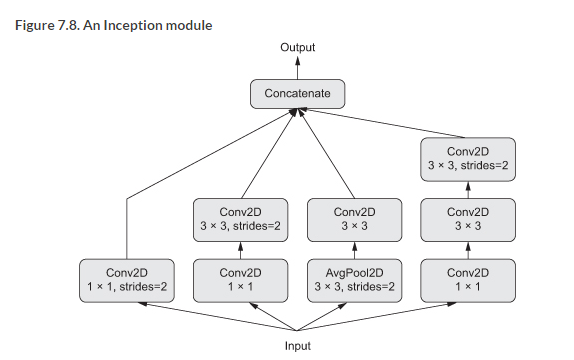

In [ ]:
# Continued from cell above

# RESIDUAL CONNECTIONS #
# Case when the feature-map sizes are the same, using identity residual connections
x = ... # where x is a 4D input tensor
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.add([y, x])

# Case when the feature-map sizes differ, using alinear residual connection
x = ... # where x is a 4D input tensor
y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.MaxPooling2D(2, strides=2)(y)

residual = layers.Conv2D(128, 1, strides=2, padding='same')(x)
y = layers.add([y, residual])

# CALLBACKS #
# Some of the available callbacks
keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger

# Early stopping and model checkpoint callbacks
callbacks_list = [keras.callbacks.EarlyStopping(monitor='acc',patience=1,),
                  keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True,)]
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x, y, epochs=10, batch_size=32, callbacks=callbacks_list, validation_data=(x_val, y_val))

# Reducing rate of learning when loss reduction plateaus
callbacks_list = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)]

model.fit(x, y, epochs=10, batch_size=32, callbacks=callbacks_list, validation_data=(x_val, y_val))

# TENSORBOARD #
callbacks = [keras.callbacks.TensorBoard(log_dir=folder_dir, histogram_freq=1, embeddings_freq=1)]
history = model.fit(x_train, y_train, epochs=20,batch_size=128, validation_split=0.2, callbacks=callbacks)

# Take a look at graph visualizations
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='example_model.png') # shows the topology of the network

# BATCH NORMALIZATION #
# After a Conv layer
conv_model.add(layers.Conv2D(32, 3, activation='relu'))
conv_model.add(layers.BatchNormalization())
# After a dense layer
dense_model.add(layers.Dense(32, activation='relu'))
dense_model.add(layers.BatchNormalization())

# DEPTHWISE SEPARABLE CONVOLUTION #
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.GlobalAveragePooling2D())

# MODEL ENSEMBLING #
# Including model weights learned during validation
# To search for a good set of ensembling weighs use an optimization algorithm such as Nelder-Mead
preds_a = model_a.predict(x_val)
preds_b = model_b.predict(x_val)
preds_c = model_c.predict(x_val)
final_preds = 0.5 * preds_a + 0.25 * preds_b + 0.1 * preds_c 

#### 7.13.3 Using TensorFlow Directly

In [ ]:
import tensorflow as tf

str_const = tf.constant('a_string') # creating a tensor object of a constant
num_const = tf.constant(100) # same as above but with a number

# Session Object - Encapsulates the environment in which operation objects are evaluated
sess = tf.Session()
sess.run(str_const) # Running the constant (just an example)
type(sess.run(str_const)) # gives back the type

# Operations - Multiple can be lined to run during a session
mat1 = np.array([[5.0, 5.0]])
mat2 = np.array([[2.0], [2.0]])
x = tf.constant(mat1)
y = tf.constant(mat2)
with tf.Session() as sess:
    print('Multiplicaton', sess.run(x*y)) # OR...
mat_multi = tf.matmul(x, y)
with tf.Session() as sess:
    print(sess.run(mat_multi))
    
# Operations with Placeholders    
x = tf.placeholder(tf.int32) # Creates a placeholder for a constant by specifying the type
y = tf.placeholder(tf.int32) # might need to change 32 to 64 depending on the computer bits
add = tf.add(x,y) # Analogous to functions in python because we haven't specified value of x and y
mul = tf.mul(x,y) 
with tf.Session() as sess:
    print('Addition', sess.run(add, feed_dict={x:20, y:30}))
    print('Multiplicaton', sess.run(mul, feed_dict={x:20, y:40}))
    
# APPROACH 1: MANUAL GRAPH DEFINITION - MNIST EXAMPLE 
x = tf.placeholder(tf.float32, shape=[None, 784]) # where 'None' is a placeholder for the batch size, as giving all images at once is too much for the model
W = tf.Variable(tf.zeros([784,10])) # weights
b = tf.Variables(tf.zeros([10])) # biases - need them so we don't get cases where an input to a neuron is 0
y = tf.matmul(x, W) + b # this is the graph
y_true = tf.placeholder(tf.float32, shape=[None, 10]) # where we will add the correct labels
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y)) # loss function - defines the error
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5) # Optimizer - how we minimize the error. Faster rates tend to be less accurate
# Train
train = optimizer.minimize(cross_entropy)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x, batch_y = df.next_batch(100)
        sess.run(train, feed_dict={x:batch_x, y:batch_y})
    matches = tf.equal(tf.argmax(y,1), tr.argmax(y_true, 1)) # when the model predicted right
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    print(sess.fun(acc, feed_dict={x:test_df.images, y_true:test_df.labels}))
    
# APPROACH 2: USING TENSORFLOW ESTIMATOR OBJECTS - MNIST EXAMPLE
'''Notes
1. Column names can't have spaces or special characters
2. The target column values must be integers
3. Scale the Data
'''
# 1. Create feature columns
feat_cols = []
for col in X.columns:
    feat_cols.append(tf.feature_columns.numeric_column(col))
# 2. Create Input Function
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=5, shuffle=True) #epoch is going through all the training data at least once
# 3. Create Estimator - #each num in units list is the number of neurons at each layer
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=3,feature_columns=feat_cols) 
# 4. Train Estimator
classifier.train(input_fn=input_func, steps=50)
# 5. Test Estimator
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test), shuffle=False)
pred = list(classifier.predict(input_fn=pred_fn))
final_preds = []
for p in pred:
    final_preds.append(p['class_ids'][0])
classification_report(y_test, final_preds)

# APPROACH 3: CREATE VIA FUNCTION AND LOOP #
he_init = tf.variance_scaling_initializer()

def dnn(inputs, n_hidden_layers=5, n_neurons=100, name=None,
        activation=tf.nn.elu, initializer=he_init):
    with tf.variable_scope(name, "dnn"):
        for layer in range(n_hidden_layers):
            inputs = tf.layers.dense(inputs, n_neurons, activation=activation,
                                     kernel_initializer=initializer,
                                     name="hidden%d" % (layer + 1))
        return inputs

# He Initialization - To randonmly initialize the weights #
he_init = tf.variance_scaling_initializer()
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, 
                         kernel_initializer=he_init, name='hidden1')

# ELU Activation Function - A step up from ReLU #
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name='hidden1')

# BATCH NORMALIZATION
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
training = tf.placeholder_with_default(False, shape=(), name='training')

hidden1 = tf.layers.dense(X, n_hidden, name='hidden1')
bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9)
bn1_act = tf.nn.elu(bn1)

logits_before_bn = tf.layers.dense(bn1_act, n_outputs, name='outputs')
logits = tf.layers.batch_normalization(logits_before_bn, training=training,
                                      momentum=0.9)

# BATCH NORMALIZATION USING CLEANER CODE # 
from functools import partial

my_batch_norm_layer = partial(tf.layers.batch_normalization, training=training,
                             momentum=0.9)
hidden1 = tf.layers.dense(X, n_hidden1, name='hidden1')
bn1 = my_batch_norm_layer(hidden1)
bn1_act = tf.nn.elu(bn1)
logits_before_bn = tf.layers.dense(bn1_act, n_outputs, name='outputs')
logits = my_batch_norm_layer(logits_before_bn)

# Execution Phase
extra_update_ops = tf.get_collections(tf.GraphKeys.UPDATE_OPS)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteratino in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, extra_update_ops],
                    feed_dict={training: True, X: X_batch, y:y_batch})
        accuracy_val = accuracy_eval(feed_dict={X:mnist.test.images,
                                               y:mnist.test.labels})
        print(epoch, 'Test accuracy:', accuracy_val)
    save_path = saver.save(sess, "./my_model_final.ckpt")
    

# GRADIENT CLIPPING
threshold = 1.0
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(loss)
capped_gvs = [(tf.clip_by_balue(grad, -threshold, threshold), var)
             for grad, var in grads_and_vars]
training_op = optimizer.apply_gradient(capped_gvs)

# REUSING PRETRAINED LAYERS #
import_meta_graph() # imports operations from the pretrained layers into default graph
saver = tf.train.import_meta_graph("./my_model_final.ckpt.meta")
get_operation_by_name() # returns the operationsyou'll need for training

X = tf.get_default_graph().get_tensor_by_name("X:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")
accuracy = tf.get_default_graph().get_tensor_by_name("eval/accuracy:0")
training_op = tf.get_default_graph().get_operation_by_name("GradientDescent")

'''The above is assuming the pretrained model is well documented. Otherwise,
you can use the following to get the operations'''
for op in tf.get_default_graph().get_operations():
    print(op.name)
    
# Freezing the lower layers
train_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                              scope='hidden[34]|outputs')
training_op = optimizer.minimize(loss, var_list=train_vars)
'''The above gives the model only those layers to train: 3, 4 and output'''

# FASTER OPTIMIZERS #
tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)
tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9, use_nesterov=True)
# Nesterov is preferred over vanilla momentum
tf.train.RMSPropOptimizer(learning_rate=learning_rate, momentum=0.9,
                         decay=0.9, epsilon=1e-10)
tf.train,AdamOptimizer(learning_rate=learning_rate)

# LEARNING RATE SCHEDULE
initial_learning_rate = 0.1
decay_steps = 10000
decay_rate = 1/10
global_step = tf.Variable(0, trainable=False, name='global_step')
learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step,
                                          decay_steps, decay_rate)
optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9)
training_op = optimizer.minimize(loss, global_step=global_step)

# REGULARIZATION #
my_dense_layer = partial(
    tf.layers.dense, activation=tf.nn.relu, 
    kernel_regularizer=tf.contrib.layers.l1_regularizer(scale))

with tf.name_scope("dnn"):
    hidden1 = my_dense_layer(X, n_hidden1, name="hidden1")
    hidden2 = my_dense_layer(hidden1, n_hidden2, name="hidden2")
    logits = my_dense_layer(hidden2, n_outputs, activation=None, name='outputs')
    

# DROPOUT #
dropout_rate = 0.5 # == 1-keep_prob
X_drop = tf.layers.dropout(X, dropout_rate, training_training)

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X_drop, n_hidden1, activation=tf.nn.relu,
                              name='hidden1')
    hidden1_drop = tf.layers.dropout(hidden, dropout_rate, training=training)
    logits = tf.layers.dense(hidden1_drop, n_outputs, name='outputs')
    
# MAX-NORM REGULARIZATION #
def max_norm_regularizer(threshold, axes=1, name='max_norm',
                        collection='max_norm')
    def max_norm(weights):
        clipped = tf.clip_by_norm(weights, clip_norm=threshold, axes=axes)
        clip_weights = tf.assign(weights, clipped, name=name)
        tf.add_to_collection(collection, clip_weights)
        return None # there is no regulatization loss term
    
    return max_norm

max_norm_reg = max_norm_regularizer(threshold=1.0)

with tf.name_Scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden, activation=tf.nn.rely,
                             kernel_regularizer=max_norm_reg, name='hidden1')
    logits = tf.layers.dense(hidden1, n_outputs, name="outputs")
    
clip_all_Weights = tf.get_collection("max_norm")

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            clip_weights.eval()
        acc_valid = accuracy_eval(feed_dict={X: x_valid, y: y_valid})
        print(epoch, "validation accuracy:", acc_valid)
        
    save_path = saver.save(sess, "./my_model_final.ckpt")

### 7.14 Convoluted Neural Networks (CNN)

#### 7.14.1 Using Keras

In [2]:
from keras.layers import Convolutional
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activatoin='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2))) #reduces complexity w/o reducing performance
classifier.add(Convolution2D(32, 3, 3, activation='relu')) # 2nd Conv Layer
classifier.add(MaxPooling2D(pool_size=(2,2))) # 2nd Conv Layer
classifier.add(Flatten())
classifier.add(Dense(output_dim=128, activation='relu')) #hidden layer 
classifier.add(Dense(output_dim=1, activation='sigmoid')) #output layer
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# IMAGE AUGMENTATION
# Used to reduce overfitting

# 1. ImageDataGenerator - performs random transformations to image (flip, rotate, etc)
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, 
                                   zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('dataset_train_set', 
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                         class_mode='binary')

model.fit_generator(train_set, steps_per_epoch=1000, epochs=25,
                    validation_data=test_set, validation_steps=2000)

#### 7.14.1 Using TensorFlow

Sources:
- GREAT visual representation:
    - scs.ryerson.ca/~aharley/vis/conv/flat.html

In [ ]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters = [:3, :, 0] = 1 # creates a vertical line
filters[3, :, :, 1] = 1 # creates a horizontal line
'''In this example we are creating the filters. In a real CNN you let the algorithm find them'''

# Create graph with input X plus convolutional layer applying the filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding='SAME')
'''VALID padding does not use zero-padding. SAME does'''

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X:dataset})
    
# MAX POOLING LAYER
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X:: dataset})

plt.imshow(output[0].astype(np.uint8)) # plots output for the 1st image
plt.show()

### 7.15 Text Sequences and Time-Series

#### 7.15.1 Recurrent Neural Networks (RNN) - With Keras

In [ ]:
from keras.layers import SimpleRNN

model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32)) # simple RNN is not great for text processing since it performs badly on long sequences

# LSTM and GRU #
from keras.layers import LSTM
from keras.layers import GRU # LSTM and GRU perform considearbly better on text thatn SimpleRNN
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# For Text Sequences
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# For Oher Sequences (such as Time Series) -This adds: A Bidirectional Layer, Stacked Layers, and Dropout
model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5, return_sequences=True
                                          input_shape=(shape1, shape2, shape3)))) # for a bidirectional model (mainly NLP)
model.add(layers.GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

#### 7.15.2 1D Convolutional Neural Networks (1D CNN) - With Keras

In [ ]:
# Used for sequences, as a faster/lighter alternative to RNNs
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_lem)) # if doing a text sequence task
model.add(layers.Conv1D(32, 7, activatoin='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalmaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(l1=1e-4), loss='binary_crossentropy', metrics=['acc'])
# ...

# 1D As Pre-processing of Long Sequences to Feed into RNNs
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, shape1, shape3)))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
movel.add(layers.GRU(32, dropout=0.1, recurrent_droppout=0.5))
model.add(layers.Dense(1))
# ...

### 7.16 Autoencoders

#### 7.16.1 Stacked Autoencoders - Using 2 Graphs

In [ ]:
from functools import partial

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 150  # codings
n_hidden3 = n_hidden1
n_outputs = n_inputs

learning_rate = 0.01
l2_reg = 0.0001

def train_autoencoder(X_train, n_neurons, n_epochs, batch_size,
                      learning_rate = 0.01, l2_reg = 0.0005, seed=42,
                      hidden_activation=tf.nn.elu,
                      output_activation=tf.nn.elu):
    graph = tf.Graph()
    with graph.as_default():
        tf.set_random_seed(seed)

        n_inputs = X_train.shape[1]

        X = tf.placeholder(tf.float32, shape=[None, n_inputs])
        
        my_dense_layer = partial(
            tf.layers.dense,
            kernel_initializer=tf.contrib.layers.variance_scaling_initializer(),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(l2_reg))

        hidden = my_dense_layer(X, n_neurons, activation=hidden_activation, name="hidden")
        outputs = my_dense_layer(hidden, n_inputs, activation=output_activation, name="outputs")

        reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

        reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
        loss = tf.add_n([reconstruction_loss] + reg_losses)

        optimizer = tf.train.AdamOptimizer(learning_rate)
        training_op = optimizer.minimize(loss)

        init = tf.global_variables_initializer()

    with tf.Session(graph=graph) as sess:
        init.run()
        for epoch in range(n_epochs):
            n_batches = len(X_train) // batch_size
            for iteration in range(n_batches):
                print("\r{}%".format(100 * iteration // n_batches), end="")
                sys.stdout.flush()
                indices = rnd.permutation(len(X_train))[:batch_size]
                X_batch = X_train[indices]
                sess.run(training_op, feed_dict={X: X_batch})
            loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})
            print("\r{}".format(epoch), "Train MSE:", loss_train)
        params = dict([(var.name, var.eval()) for var in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)])
        hidden_val = hidden.eval(feed_dict={X: X_train})
        return hidden_val, params["hidden/kernel:0"], params["hidden/bias:0"], params["outputs/kernel:0"], params["outputs/bias:0"]

# Train Phase 1
hidden_output, W1, b1, W4, b4 = train_autoencoder(mnist.train.images, n_neurons=300, n_epochs=4, batch_size=150,
                                                  output_activation=None)
# Train Phase 2
_, W2, b2, W3, b3 = train_autoencoder(hidden_output, n_neurons=150, n_epochs=4, batch_size=150)

# Stack the Two Autoencoders
reset_graph()

n_inputs = 28*28

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden1 = tf.nn.elu(tf.matmul(X, W1) + b1)
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2) + b2)
hidden3 = tf.nn.elu(tf.matmul(hidden2, W3) + b3)
outputs = tf.matmul(hidden3, W4) + b4

#### 7.16.2 Stacked Autoencoders - Using 1 Graph

In [ ]:
activation = tf.nn.elu
regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
initializer = tf.contrib.layers.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

weights1_init = initializer([n_inputs, n_hidden1])
weights2_init = initializer([n_hidden1, n_hidden2])
weights3_init = initializer([n_hidden2, n_hidden3])

weights1 = tf.Variable(weights1_init, dtype=tf.float32, name="weights1")
weights2 = tf.Variable(weights2_init, dtype=tf.float32, name="weights2")
weights3 = tf.Variable(weights3_init, dtype=tf.float32, name="weights3")

biases1 = tf.Variable(tf.zeros(n_hidden1), name="biases1")
biases2 = tf.Variable(tf.zeros(n_hidden2), name="biases2")
biases3 = tf.Variable(tf.zeros(n_hidden3), name="biases3")

hidden1 = activation(tf.matmul(X, weights1) + biases1)
hidden2 = activation(tf.matmul(hidden1, weights2) + biases2)
outputs = tf.matmul(hidden2, weights3) + biases3

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

optimizer = tf.train.AdamOptimizer(learning_rate)

with tf.name_scope("phase1"):
    phase1_outputs = tf.matmul(hidden1, weights3) + biases3  # bypass hidden2 and hidden3
    phase1_reconstruction_loss = tf.reduce_mean(tf.square(phase1_outputs - X))
    phase1_reg_loss = regularizer(weights1) + regularizer(weights3)
    phase1_loss = phase1_reconstruction_loss + phase1_reg_loss
    phase1_training_op = optimizer.minimize(phase1_loss)

with tf.name_scope("phase2"):
    phase2_reconstruction_loss = tf.reduce_mean(tf.square(hidden2 - hidden1))
    phase2_reg_loss = regularizer(weights2) + regularizer(weights3)
    phase2_loss = phase2_reconstruction_loss + phase2_reg_loss
    train_vars = [weights2, biases2, weights3, biases3]
    phase2_training_op = optimizer.minimize(phase2_loss, var_list=train_vars) # freeze hidden1

init = tf.global_variables_initializer()
saver = tf.train.Saver()
    
training_ops = [phase1_training_op, phase2_training_op]
reconstruction_losses = [phase1_reconstruction_loss, phase2_reconstruction_loss]
n_epochs = [4, 4]
batch_sizes = [150, 150]

with tf.Session() as sess:
    init.run()
    for phase in range(2):
        print("Training phase #{}".format(phase + 1))
        for epoch in range(n_epochs[phase]):
            n_batches = mnist.train.num_examples // batch_sizes[phase]
            for iteration in range(n_batches):
                print("\r{}%".format(100 * iteration // n_batches), end="")
                sys.stdout.flush()
                X_batch, y_batch = mnist.train.next_batch(batch_sizes[phase])
                sess.run(training_ops[phase], feed_dict={X: X_batch})
            loss_train = reconstruction_losses[phase].eval(feed_dict={X: X_batch})
            print("\r{}".format(epoch), "Train MSE:", loss_train)
            saver.save(sess, "./my_model_one_at_a_time.ckpt")
    loss_test = reconstruction_loss.eval(feed_dict={X: mnist.test.images})
    print("Test MSE:", loss_test)    
    
    
# TYING WEIGHTS #
'''It's easier to define the layers manually than using the dense() function
when tying weights'''

activation = tf.nn.elu
regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
initializer = tf.contrib.layers.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])

weights1_init = initializer([n_inputs, n_hidden1])
weights2_init = initializer([n_hidden1, n_hidden2])

weights1 = tf.Variable(weights1_init, dtype=tf.float32, name="weights1")
weights2 = tf.Variable(weights2_init, dtype=tf.float32, name="weights2")
weights3 = tf.transpose(weights2, name="weights3")  # tied weights
weights4 = tf.transpose(weights1, name="weights4")  # tied weights

biases1 = tf.Variable(tf.zeros(n_hidden1), name="biases1")
biases2 = tf.Variable(tf.zeros(n_hidden2), name="biases2")
biases3 = tf.Variable(tf.zeros(n_hidden3), name="biases3")
biases4 = tf.Variable(tf.zeros(n_outputs), name="biases4")

hidden1 = activation(tf.matmul(X, weights1) + biases1)
hidden2 = activation(tf.matmul(hidden1, weights2) + biases2)
hidden3 = activation(tf.matmul(hidden2, weights3) + biases3)
outputs = tf.matmul(hidden3, weights4) + biases4

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))
reg_loss = regularizer(weights1) + regularizer(weights2)
loss = reconstruction_loss + reg_loss

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

# UNSUPERVISED PRE-TRAINING #
activation = tf.nn.elu
regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
initializer = tf.contrib.layers.variance_scaling_initializer()

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
y = tf.placeholder(tf.int32, shape=[None])

weights1_init = initializer([n_inputs, n_hidden1])
weights2_init = initializer([n_hidden1, n_hidden2])
weights3_init = initializer([n_hidden2, n_outputs])

weights1 = tf.Variable(weights1_init, dtype=tf.float32, name="weights1")
weights2 = tf.Variable(weights2_init, dtype=tf.float32, name="weights2")
weights3 = tf.Variable(weights3_init, dtype=tf.float32, name="weights3")

biases1 = tf.Variable(tf.zeros(n_hidden1), name="biases1")
biases2 = tf.Variable(tf.zeros(n_hidden2), name="biases2")
biases3 = tf.Variable(tf.zeros(n_outputs), name="biases3")

hidden1 = activation(tf.matmul(X, weights1) + biases1)
hidden2 = activation(tf.matmul(hidden1, weights2) + biases2)
logits = tf.matmul(hidden2, weights3) + biases3

cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
reg_loss = regularizer(weights1) + regularizer(weights2) + regularizer(weights3)
loss = cross_entropy + reg_loss
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
pretrain_saver = tf.train.Saver([weights1, weights2, biases1, biases2])

# Reusing the first 2 layers of the autoencoder trained above:

n_epochs = 4
batch_size = 150
n_labeled_instances = 20000

#training_op = optimizer.minimize(loss, var_list=[weights3, biases3])  # Freeze layers 1 and 2 (optional)

with tf.Session() as sess:
    init.run()
    pretrain_saver.restore(sess, "./my_model_cache_frozen.ckpt")
    for epoch in range(n_epochs):
        n_batches = n_labeled_instances // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            indices = rnd.permutation(n_labeled_instances)[:batch_size]
            X_batch, y_batch = mnist.train.images[indices], mnist.train.labels[indices]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("\r{}".format(epoch), "Train accuracy:", accuracy_val, end="\t")
        saver.save(sess, "./my_model_supervised_pretrained.ckpt")
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print("Test accuracy:", accuracy_val)
        

#### 7.16.3 Noise Autoencoders (Dropout Noise)

In [ ]:
dropout_rate = 0.3

training = tf.placeholder_with_default(False, shape=(), name='training')

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

hidden1 = tf.layers.dense(X_drop, n_hidden1, activation=tf.nn.relu, name="hidden1")
hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu,name="hidden2")                            
hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=tf.nn.relu, name="hidden3")                            
outputs = tf.layers.dense(hidden3, n_outputs, name="outputs")        

reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, training: True})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_batch})
        print("\r{}".format(epoch), "Train MSE:", loss_train)
        saver.save(sess, "./my_model_stacked_denoising_dropout.ckpt")
        

#### 7.16.4 Sparse Autoencoders

In [ ]:
def kl_divergence(p, q):
    # Kullback Leibler divergence
    return p * tf.log(p / q) + (1 - p) * tf.log((1 - p) / (1 - q))

learning_rate = 0.01
sparsity_target = 0.1
sparsity_weight = 0.2

X = tf.placeholder(tf.float32, shape=[None, n_inputs])            # not shown in the book

hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.sigmoid) # not shown
outputs = tf.layers.dense(hidden1, n_outputs)                     # not shown

hidden1_mean = tf.reduce_mean(hidden1, axis=0) # batch mean
sparsity_loss = tf.reduce_sum(kl_divergence(sparsity_target, hidden1_mean))
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # MSE
loss = reconstruction_loss + sparsity_weight * sparsity_loss

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 100
batch_size = 1000

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        reconstruction_loss_val, sparsity_loss_val, loss_val = sess.run([reconstruction_loss, sparsity_loss, loss], feed_dict={X: X_batch})
        print("\r{}".format(epoch), "Train MSE:", reconstruction_loss_val, "\tSparsity loss:", sparsity_loss_val, "\tTotal loss:", loss_val)
        saver.save(sess, "./my_model_sparse.ckpt")
        

#### 7.16.5 Variational Autoencoders

In [ ]:
reset_graph()

from functools import partial

n_inputs = 28 * 28
n_hidden1 = 500
n_hidden2 = 500
n_hidden3 = 20  # codings
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs
learning_rate = 0.001

initializer = tf.contrib.layers.variance_scaling_initializer()

my_dense_layer = partial(
    tf.layers.dense,
    activation=tf.nn.elu,
    kernel_initializer=initializer)

X = tf.placeholder(tf.float32, [None, n_inputs])
hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3_mean = my_dense_layer(hidden2, n_hidden3, activation=None)
hidden3_sigma = my_dense_layer(hidden2, n_hidden3, activation=None)
noise = tf.random_normal(tf.shape(hidden3_sigma), dtype=tf.float32)
hidden3 = hidden3_mean + hidden3_sigma * noise
hidden4 = my_dense_layer(hidden3, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
logits = my_dense_layer(hidden5, n_outputs, activation=None)
outputs = tf.sigmoid(logits)

xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits)
reconstruction_loss = tf.reduce_sum(xentropy)

eps = 1e-10 # smoothing term to avoid computing log(0) which is NaN
latent_loss = 0.5 * tf.reduce_sum(
    tf.square(hidden3_sigma) + tf.square(hidden3_mean)
    - 1 - tf.log(eps + tf.square(hidden3_sigma)))

loss = reconstruction_loss + latent_loss

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()


n_epochs = 50
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch})
        loss_val, reconstruction_loss_val, latent_loss_val = sess.run([loss, reconstruction_loss, latent_loss], feed_dict={X: X_batch})
        print("\r{}".format(epoch), "Train total loss:", loss_val, "\tReconstruction loss:", reconstruction_loss_val, "\tLatent loss:", latent_loss_val)
        saver.save(sess, "./my_model_variational.ckpt")

## 8. Virtual Machines

### 8.1 Spark, Haddop and AWS

In [ ]:
https://aws.amazon.com/free/
https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/putty.html
'''   
# Step 1: Initiate Instance on AWS

# Step 2: Set Up Putty

# Step 3: Set up Spark
    https://medium.com/@josemarcialportilla/getting-spark-python-and-jupyter-notebook-running-on-amazon-ec2-dec599e1c297
    
# Step 3.5: If issues with Running Jupyter notebook from Ubuntu virtual machine
    I found out by repeatedly upgrading both Anaconda and Jupyter until there was no more update available.

    $conda update conda
    $conda update jupyter
    Keep in mind that multiple updates may be necessary. I lost my count at 4.

    During the upgrades, I noticed that openssl was also being upgraded as a dependent package of jupyter. So I thought it would be necessary to redo the openssl step in order to create a new mycert.pem using the newer version of the certificate.   

    That worked and allowed me to connect to the Notebook server. I struggled a bit at first since every line of code (even a print('hello') caused an infinite loop, but that should be solvable by updating Ipykernel. That is:

    $conda update ipykernel

    IF NOT: go to home/ubuntu/certs and do sudo chmod 777 mycert.pem                                                                                                                  
    IF NOT: try "sudo /home/ubuntu/anaconda3/bin/jupyter notebook"  

    THEN run "jupyter notebook" from home/ubuntu/
'''

from pyspark import SparkContext

sc = SparkContext()

%writefile example.txt
first line
second line

textFile = sc.textFile('example.txt') # creates RDD object

# Actions
textFile.count()
textFile.first()

# Transformations
secfind = textFile.filter(lambda line: 'second' in line)
secfind.collect() # will return the line where second appears
secfind.count() # returns number of lines where 'second' appears

'''
RDD - Resilient Distributed Dataset
Transformation - Spark operation that produces an RDD
Action - Spark operation that produces a local object
Job - Sequence of transformations on data with a final action (all three above combined)

'''

# EX:
# Grab (State, Amount)
step1 = clean.map(lambda lst: (lst[3], lst[-1]))
# Reduce by Key
step2 = step1.reduceByKey(lambda amt1, amt2: float(amt1) + float(amt2))
# Get rid of State, Amount titles
step3 = step2.filter(lambda x:not x[0] == 'State')
# Sort Results by the amount
step4 = step3.sortBy(lambda stAmount: stAmount[1], ascending=False)
# Action
step4.collect()